# Dependencies and initial setup

In [26]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


# all the functions are in lib/
from lib.test import *
from lib.tcp import *

def setup_dependencies():
    # This callback is needed to execute commands from the outside file in lib/
    def exec_cmd(cmd):
        out = !{cmd}
        return out

    set_exec_callback(exec_cmd)
    set_tcp_exec_callback(exec_cmd)
    setup_kernel()
    
setup_dependencies()
setup_pipes()
!sysctl kern.ipc.maxsockbuf=33554432

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
kern.ipc.maxsockbuf: 33554432 -> 33554432


In [3]:
!pwd

/data/lab3


In [6]:
!ls

.ipynb_checkpoints  lab3.ipynb          lib
ipc                 lab4_template.ipynb


# Example commands

In [11]:
latency = 10

!ipfw pipe config 1 delay {str(latency)}
!ipfw pipe config 2 delay {str(latency)}

In [16]:
print_header("Creating file to run benchmark")

!ipc/ipc-static -v -i tcp 2thread
    
print_footer("Completed")

********************************************************************************
* Creating file to run benchmark
********************************************************************************
^C
********************************************************************************
* Completed
********************************************************************************


## Structures

```c
struct tcphdr {
    u_short th_sport = 0x9d27
    u_short th_dport = 0x1896
    tcp_seq th_seq = 0x6e0e1290
    tcp_seq th_ack = 0xa79a5193
    unsigned char th_x2 :4 = 0
    unsigned char th_off :4 = 0xa
    u_char th_flags = 0x12
    u_short th_win = 0xffff
    u_short th_sum = 0
    u_short th_urp = 0
}

struct tcpcb {
    struct tsegqe_head t_segq = {
        struct tseg_qent *lh_first = 0
    }
    void *[2] t_pspare = [ 0, 0 ]
    int t_segqlen = 0
    int t_dupacks = 0
    struct tcp_timer *t_timers = 0xc3ce0200
    struct inpcb *t_inpcb = 0xc3cb3af8
    int t_state = 0x2
    u_int t_flags = 0x2a0
    struct vnet *t_vnet = 0
    tcp_seq snd_una = 0xa79a5192
    tcp_seq snd_max = 0xa79a5193
    tcp_seq snd_nxt = 0xa79a5193
    tcp_seq snd_up = 0xa79a5192
    tcp_seq snd_wl1 = 0
    tcp_seq snd_wl2 = 0
    tcp_seq iss = 0xa79a5192
    tcp_seq irs = 0
    tcp_seq rcv_nxt = 0
    tcp_seq rcv_adv = 0xffff
    u_long rcv_wnd = 0
    tcp_seq rcv_up = 0
    u_long snd_wnd = 0
    u_long snd_cwnd = 0x3fffc000
    u_long snd_spare1 = 0
    u_long snd_ssthresh = 0x3fffc000
    u_long snd_spare2 = 0
    tcp_seq snd_recover = 0xa79a5192
    u_int t_rcvtime = 0x80065647
    u_int t_starttime = 0
    u_int t_rtttime = 0x80065647
    tcp_seq t_rtseq = 0xa79a5192
    u_int t_bw_spare1 = 0
    tcp_seq t_bw_spare2 = 0
    int t_rxtcur = 0x12c
    u_int t_maxseg = 0x218
    u_int t_pmtud_saved_maxseg = 0
    int t_srtt = 0
    int t_rttvar = 0x4b0
    int t_rxtshift = 0
    u_int t_rttmin = 0x3
    u_int t_rttbest = 0
    u_long t_rttupdated = 0
    u_long max_sndwnd = 0
    int t_softerror = 0
    char t_oobflags = '\0'
    char t_iobc = '\0'
    u_char snd_scale = 0
    u_char rcv_scale = 0
    u_char request_r_scale = 0xa
    u_int32_t ts_recent = 0
    u_int ts_recent_age = 0
    u_int32_t ts_offset = 0
    tcp_seq last_ack_sent = 0
    u_long snd_cwnd_prev = 0
    u_long snd_ssthresh_prev = 0
    tcp_seq snd_recover_prev = 0
    int t_sndzerowin = 0
    u_int t_badrxtwin = 0
    u_char snd_limited = 0
    int snd_numholes = 0
    tcp_seq snd_fack = 0
    int rcv_numsacks = 0

}
```

Running ipc benchmark
Completed


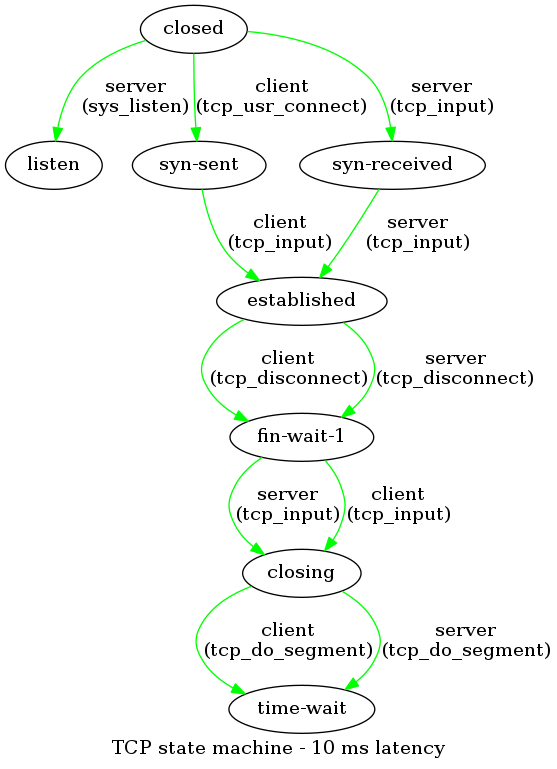

Running ipc benchmark
Completed


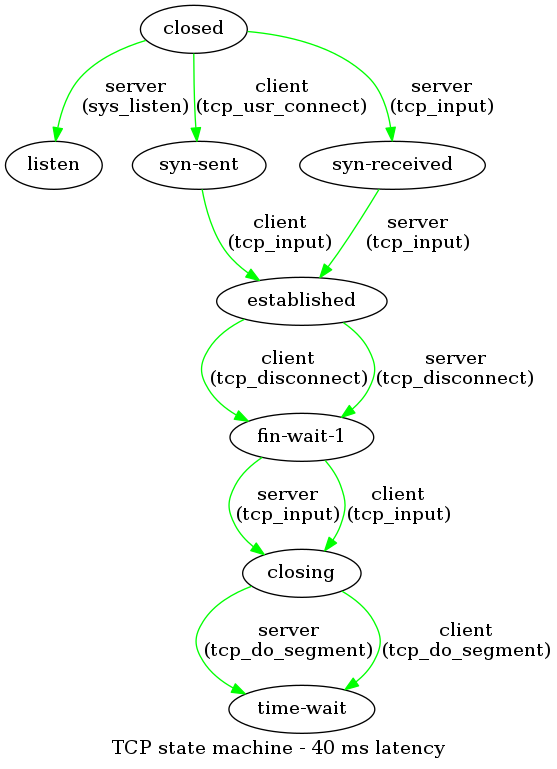

In [8]:
from IPython.display import display
setup_dependencies()
display(graph_tcp(10))
display(graph_tcp(40))

Running ipc benchmark
Completed


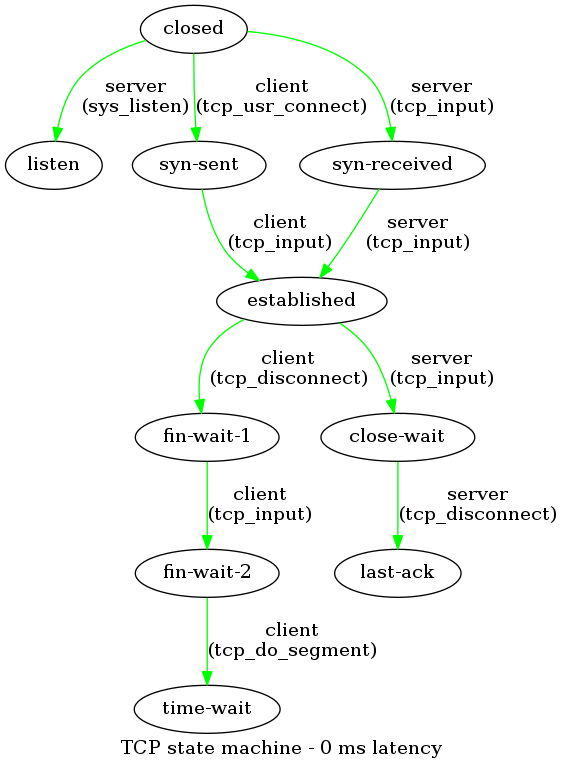

Running ipc benchmark
Completed


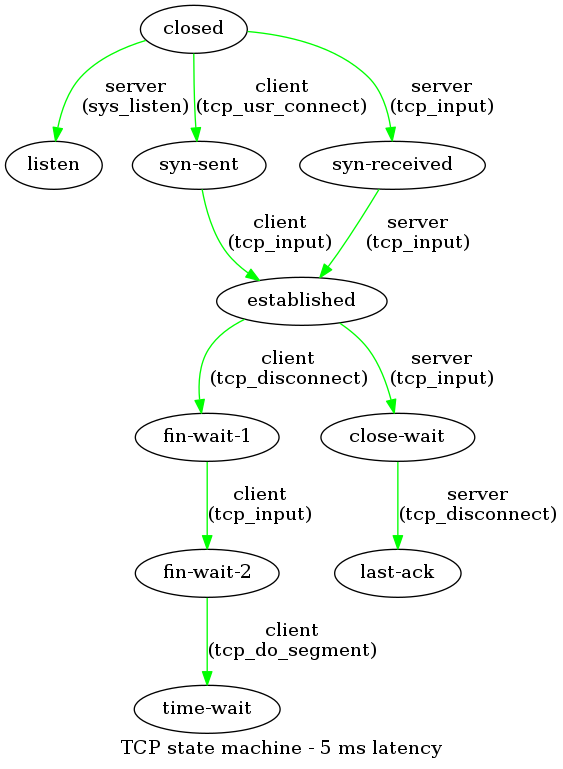

Running ipc benchmark
Completed


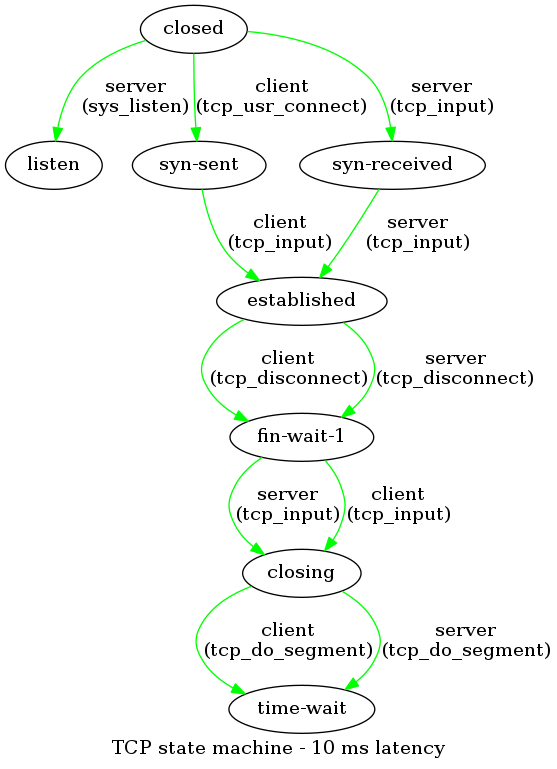

Running ipc benchmark
Completed


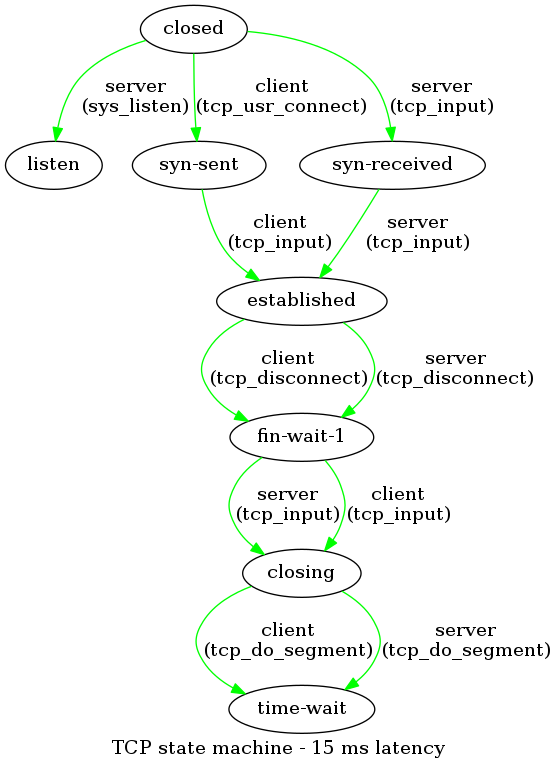

Running ipc benchmark
Completed


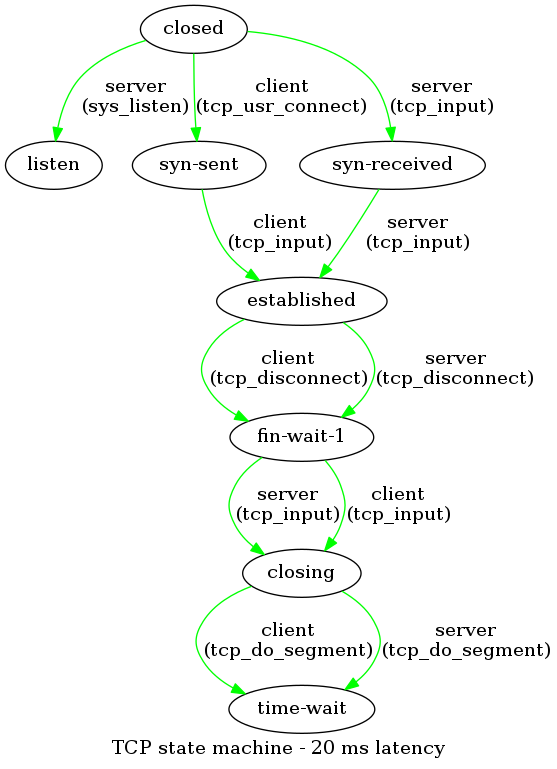

Running ipc benchmark
Completed


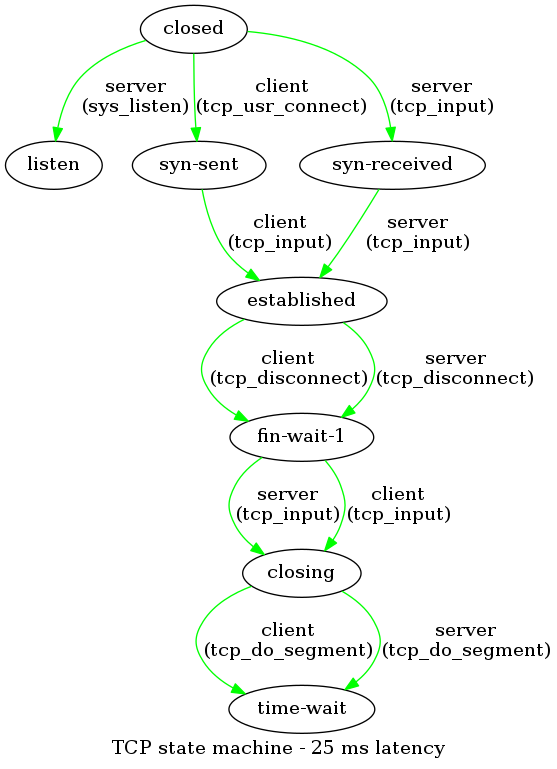

Running ipc benchmark
Completed


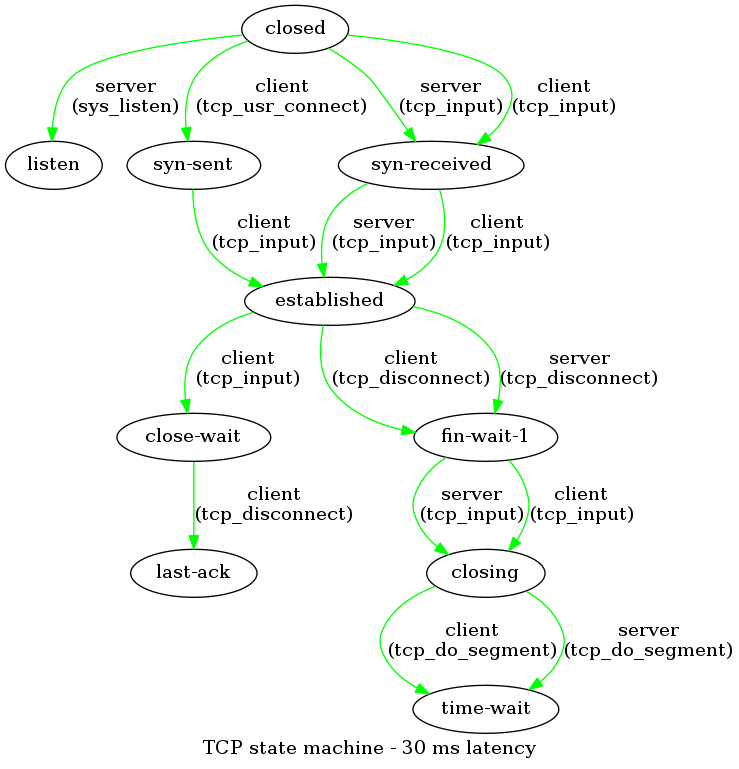

Running ipc benchmark
Completed


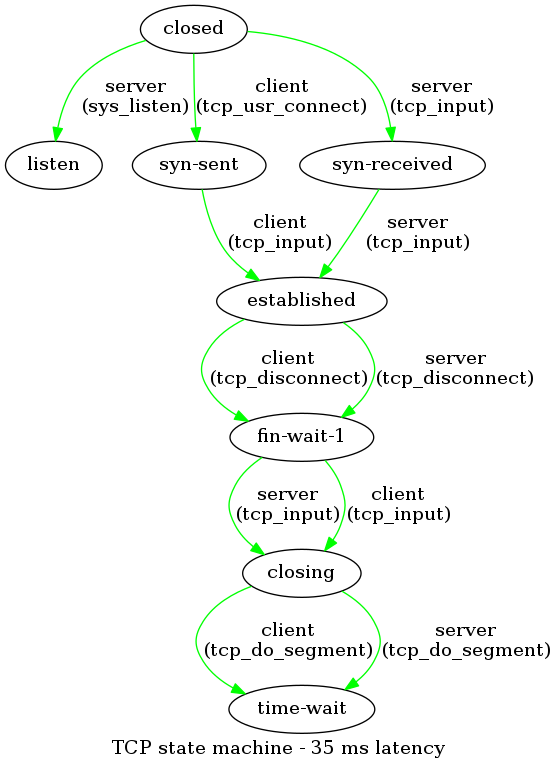

Running ipc benchmark
Completed


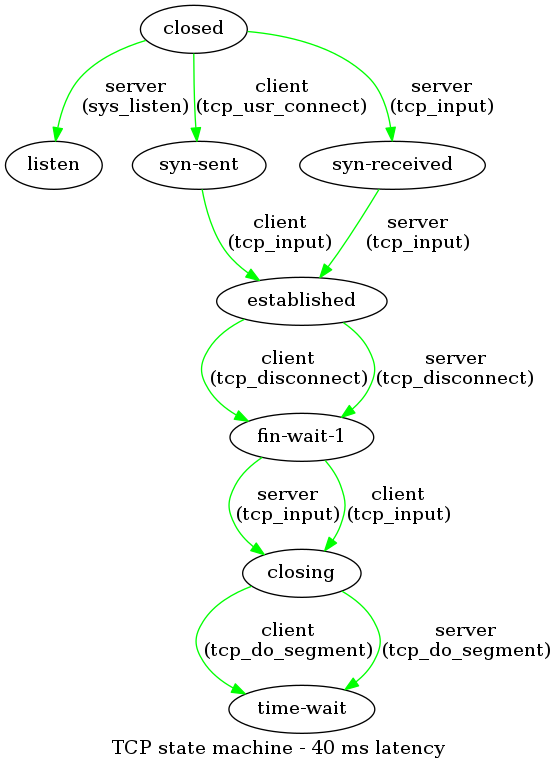

In [9]:
from IPython.display import display
setup_dependencies()
for i in range(0,41,5):
    display(graph_tcp(i))

Running ipc benchmark
Completed


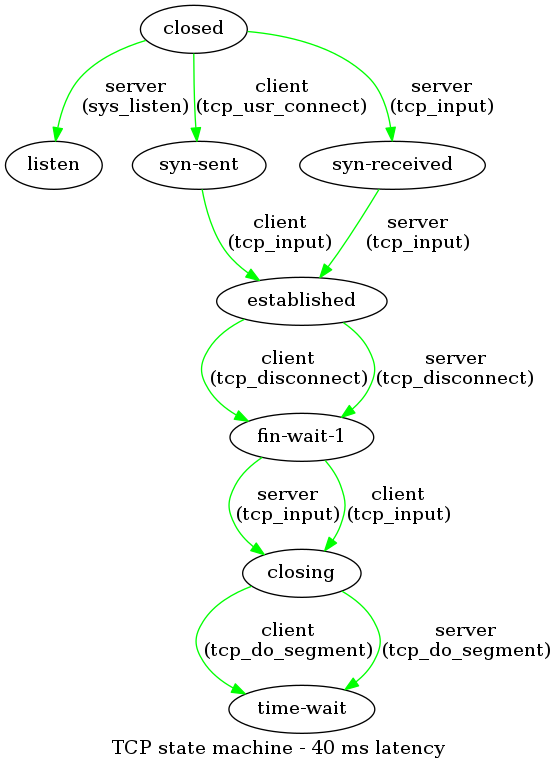

In [5]:
setup_dependencies()
display(graph_tcp(40))

In [13]:
benchmark_tcp_bandwith(latencies=range(0,41,5), trials= 3, output_name="latencies.json")

Latency: 0
Latency: 5
Latency: 10
Latency: 15
Latency: 20
Latency: 25
Latency: 30
Latency: 35
Latency: 40
values collected: 27


{'latencies': [0, 5, 10, 15, 20, 25, 30, 35, 40],
 'output': ['716345038',
  '611776320',
  '615226893',
  '615349618',
  '616345770',
  '711358226',
  '3519326717',
  '3519365271',
  '3519489823',
  '3519376629',
  '3519388820',
  '3519354751',
  '6939263604',
  '6939425274',
  '6939344858',
  '6939328841',
  '6937954939',
  '6939377686',
  '31259278411',
  '31259225525',
  '31259331697',
  '31259408110',
  '31259294315',
  '31259306122',
  '41679247634',
  '41678574441',
  '41679186450'],
 'program_outputs': ['',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '']}

In [15]:
benchmark_tcp_bandwith(latencies=range(0,41,5), flags= "-s",trials=3, output_name="latencies_s.json")

Latency: 0
Latency: 5
Latency: 10
Latency: 15
Latency: 20
Latency: 25
Latency: 30
Latency: 35
Latency: 40
values collected: 27


{'latencies': [0, 5, 10, 15, 20, 25, 30, 35, 40],
 'output': ['705590167',
  '702531447',
  '705825016',
  '701148361',
  '699663035',
  '706674112',
  '3187584823',
  '3189420812',
  '3189383028',
  '3189405879',
  '3189443089',
  '3189369905',
  '6169396588',
  '6169434914',
  '6169455942',
  '6169457751',
  '6173136383',
  '6197979813',
  '7749295884',
  '7949265282',
  '7749438551',
  '7749350711',
  '7949352755',
  '7629394406',
  '10329279326',
  '10529373405',
  '10169444675'],
 'program_outputs': ['',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '']}

xvs len: 9 yvs len: 27 trials: 3
xvs len: 9 yvs len: 27 trials: 3


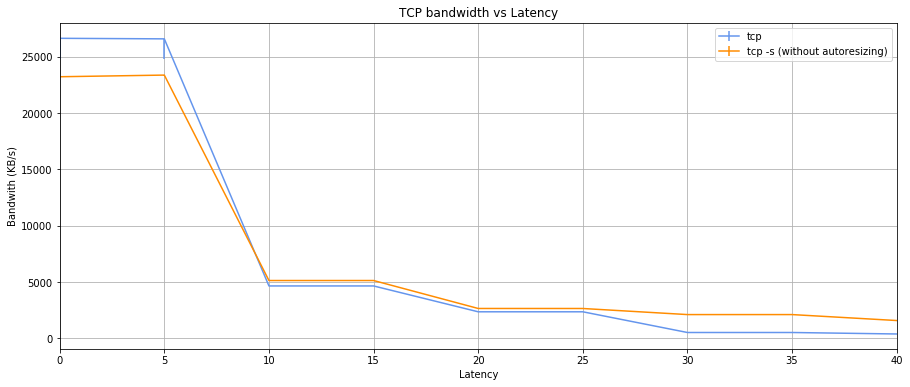

In [18]:
ax = plot_tcp_bandwidth(input_data_file="latencies.json",trials=3,y_label="Bandwith (KB/s)",x_label="Latency (ms)",label="tcp")
plot_tcp_bandwidth(input_data_file="latencies_s.json",trials=3,label="tcp -s (without autoresizing)", title="TCP bandwidth vs Latency", axis = ax, save_name="tcp_bandwidth.png")

In [19]:
setup_dependencies()
benchmark_variables(latency=5,output_name="all_variables.json")

Latency: 5
values collected: 140088


{'latencies': [5],
 'output': ['source:10141',
  'dest:37411',
  'Seq:286764782',
  'Ack:1245208676',
  'Time:31372259485531',
  'wnd:0',
  'cwnd:1073725440',
  'ssthresh:1073725440',
  'source:37411',
  'dest:10141',
  'Seq:1245208676',
  'Ack:286764783',
  'Time:31372259681330',
  'wnd:0',
  'cwnd:1073725440',
  'ssthresh:1073725440',
  'source:10141',
  'dest:37411',
  'Seq:286764783',
  'Ack:1245208676',
  'Time:31372260752247',
  'wnd:65535',
  'cwnd:14480',
  'ssthresh:1073725440',
  'source:10141',
  'dest:37411',
  'Seq:286766231',
  'Ack:1245208676',
  'Time:31372261007220',
  'wnd:65536',
  'cwnd:14480',
  'ssthresh:1073725440',
  'source:37411',
  'dest:10141',
  'Seq:1245208676',
  'Ack:286767679',
  'Time:31372261192144',
  'wnd:65536',
  'cwnd:14481',
  'ssthresh:1073725440',
  'source:10141',
  'dest:37411',
  'Seq:286767679',
  'Ack:1245208676',
  'Time:31372261289760',
  'wnd:65536',
  'cwnd:14480',
  'ssthresh:1073725440',
  'source:10141',
  'dest:37411',
  'Seq:2867

Data prepared. Now plotting..
xvs len: 154 yvs len: 154 trials: 1
Data prepared. Now plotting..
xvs len: 103 yvs len: 103 trials: 1
Data prepared. Now plotting..
xvs len: 62 yvs len: 62 trials: 1
Data prepared. Now plotting..
xvs len: 52 yvs len: 52 trials: 1
Data prepared. Now plotting..
xvs len: 44 yvs len: 44 trials: 1
Data prepared. Now plotting..
xvs len: 39 yvs len: 39 trials: 1


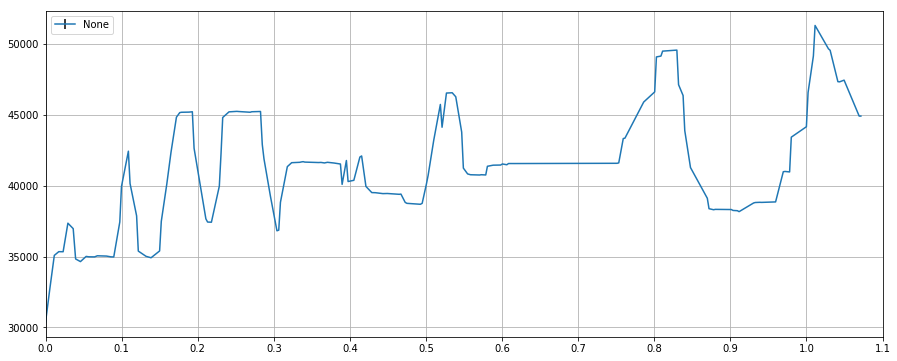

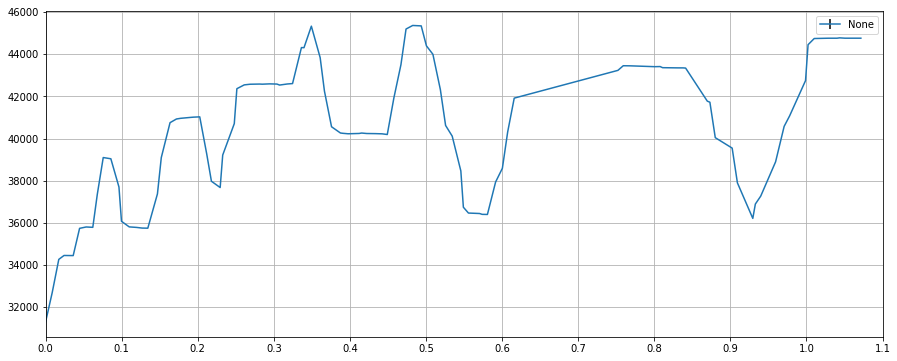

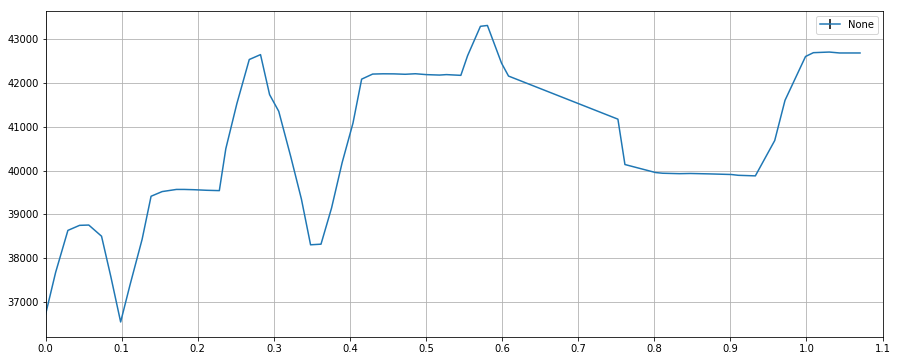

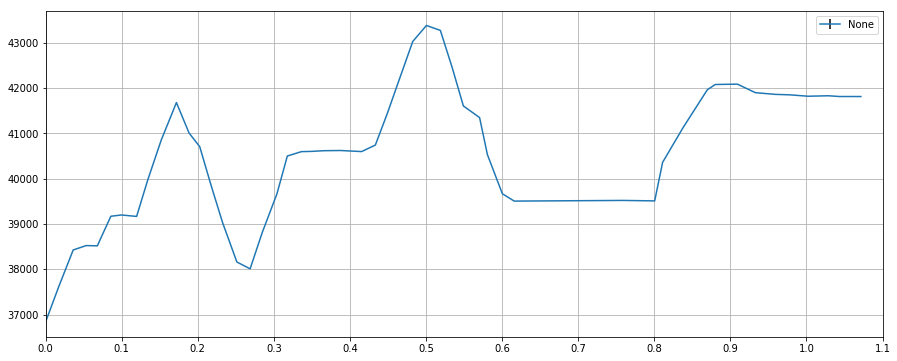

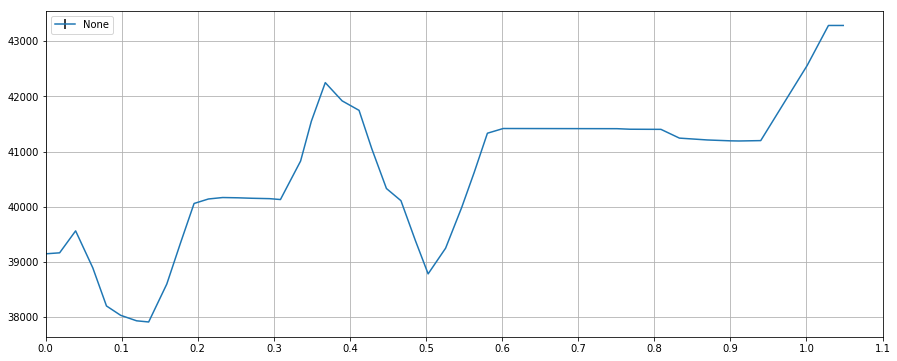

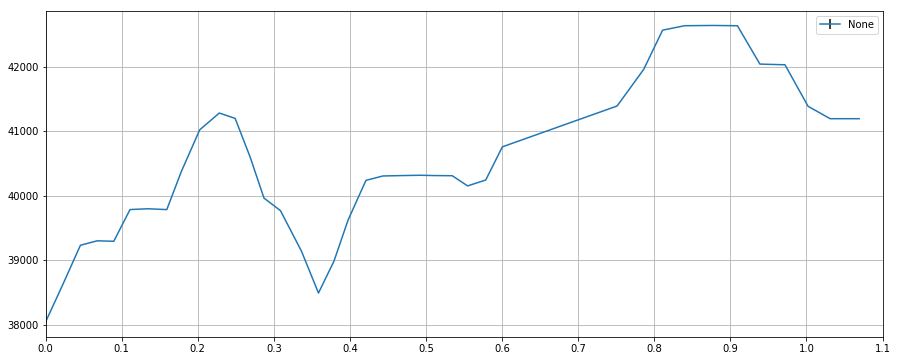

In [20]:
setup_dependencies()
for res in [20,30, 50,60,70,80]:
    plot_tcp_bandwidth_across_time("all_variables.json",resolution = res)

Data prepared. Now plotting..
xvs len: 11629 yvs len: 11629 trials: 1


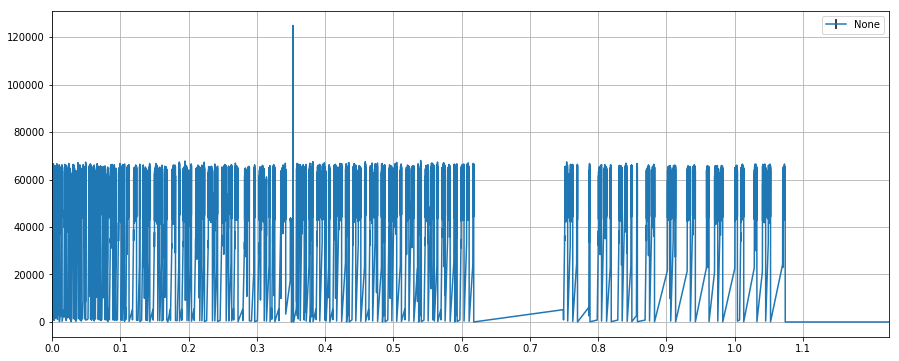

In [23]:
plot_tcp_bandwidth_across_time("all_variables.json",resolution = 1)

Data prepared. Now plotting..
xvs len: 11629 yvs len: 11629 trials: 1


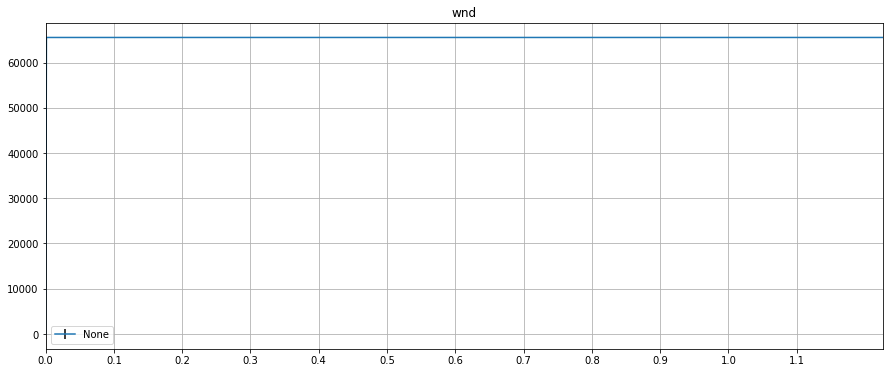

In [27]:
plot_variable("all_variables.json", title="wnd", var ="wnd")

Data prepared. Now plotting..
xvs len: 11629 yvs len: 11629 trials: 1


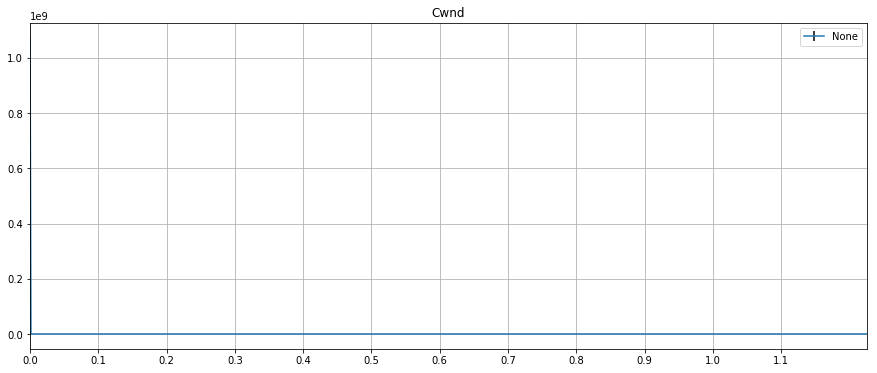

In [28]:
plot_variable("all_variables.json", title="Cwnd", var ="cwnd")